In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(
    n_samples=1000,
    centers=3,
    n_features=2,
    random_state=42
)

In [5]:
X, y

(array([[-6.59633932, -7.13901457],
        [-6.13753182, -6.58081701],
        [ 5.19820575,  2.04917508],
        ...,
        [ 3.69047995,  4.60555175],
        [ 4.03036663,  1.78619838],
        [-7.44179522, -7.08933147]]),
 array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
        2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2,
        0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
        2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
        0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
        2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
        1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
        0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2,
        1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1,
        1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1,
        2, 2, 1, 0, 2, 0, 0, 

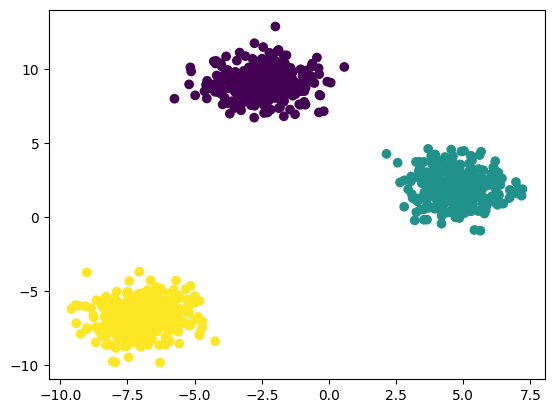

In [6]:
plt.scatter(X[:,0], X[:, 1], c=y)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [12]:
# Elbow method to select K value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[1400.0000000000002,
 439.94989480569063,
 45.53331360570866,
 39.52721686418521,
 37.43717048418603,
 30.29671367490701,
 28.16150818643204,
 23.43778721503543,
 21.004916247410392,
 18.994968274886226]

Text(0, 0.5, 'WCSS')

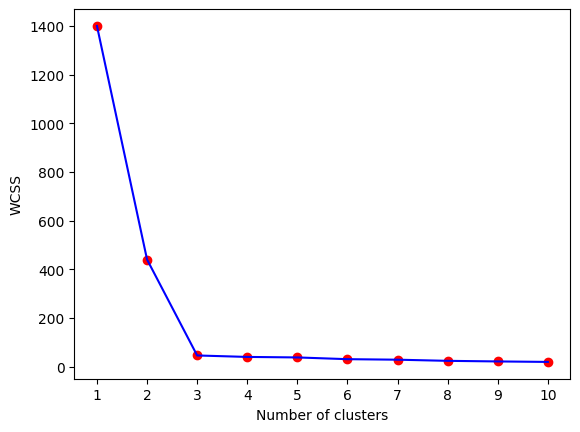

In [18]:
plt.scatter(range(1, 11), wcss, c='r')
plt.plot(range(1, 11), wcss, c='b')
plt.xticks(np.arange(1, 11, 1))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=42)

In [20]:
X_test_pred = kmeans.predict(X_test_scaled)

In [21]:
kmeans.cluster_centers_

array([[ 1.30948927,  0.07588821],
       [-1.08674635, -1.2592177 ],
       [-0.18725689,  1.1407132 ]])

In [22]:
kmeans.labels_

array([1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0,
       2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0,
       2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1,
       0, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0,
       0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 2,
       0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 2,

In [23]:
kmeans.score(X_test_scaled)

-18.115224128072725

In [24]:
from kneed import KneeLocator

In [27]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [28]:
kl.all_elbows

{np.int64(3)}

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
silhouette_score(X_train_scaled, kmeans.labels_)

np.float64(0.8421639000152683)

In [31]:
silhouette_coeff = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++',
                    random_state=42)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coeff.append(score)
silhouette_coeff

[np.float64(0.6867964692302869),
 np.float64(0.8421639000152683),
 np.float64(0.6709126436976803),
 np.float64(0.655445258107075),
 np.float64(0.49619691582923725),
 np.float64(0.4749749156398288),
 np.float64(0.3433571004032379),
 np.float64(0.332804885270327),
 np.float64(0.33848617225846284)]

Text(0, 0.5, 'Silhouette Coefficient')

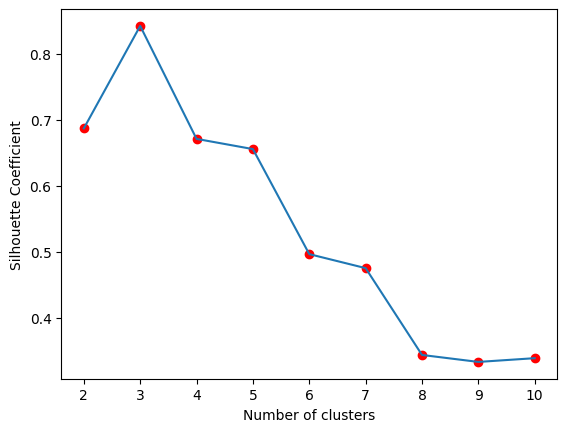

In [32]:
plt.plot(range(2, 11), silhouette_coeff)
plt.scatter(range(2, 11), silhouette_coeff, c='r')
plt.xticks(np.arange(2, 11, 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')